In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error ,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
car_data = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
car_data.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [5]:
car_data.loc[:,'company'] = car_data.CarName.str.split(' ').str[0]

In [6]:
car_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [7]:
car_data.company = car_data.company.apply(lambda x: str(x).lower())

In [8]:
car_data.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [9]:
car_data.company.value_counts()

toyota         31
nissan         18
mazda          15
honda          13
mitsubishi     13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
jaguar          3
alfa-romero     3
chevrolet       3
renault         2
vw              2
maxda           2
toyouta         1
porcshce        1
mercury         1
vokswagen       1
Name: company, dtype: int64

In [10]:
car_data['company'].replace('maxda','mazda',inplace=True)
car_data['company'].replace('porcshce','porsche',inplace=True)
car_data['company'].replace('toyouta','toyota',inplace=True)
car_data['company'].replace(['vokswagen','vw'],'volkswagen',inplace=True)

In [11]:
car_data.company.value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
volkswagen     12
subaru         12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
mercury         1
Name: company, dtype: int64

In [12]:
car_data.drop(['CarName'],axis = 1 ,inplace =True)

In [13]:
car_data.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [14]:
car_data.fuelsystem.unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [15]:
car_data.fuelsystem.replace('mfi','mpfi',inplace = True)

In [16]:
car_data.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [17]:
car_data.replace('dohcv','dohc',inplace = True)
car_data.replace('ohcv','ohc',inplace = True)

In [18]:
car_data.drivewheel.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [19]:
car_data.drivewheel.replace('4wd', 'fwd', inplace = True)

In [20]:
car_data.drivewheel.unique()

array(['rwd', 'fwd'], dtype=object)

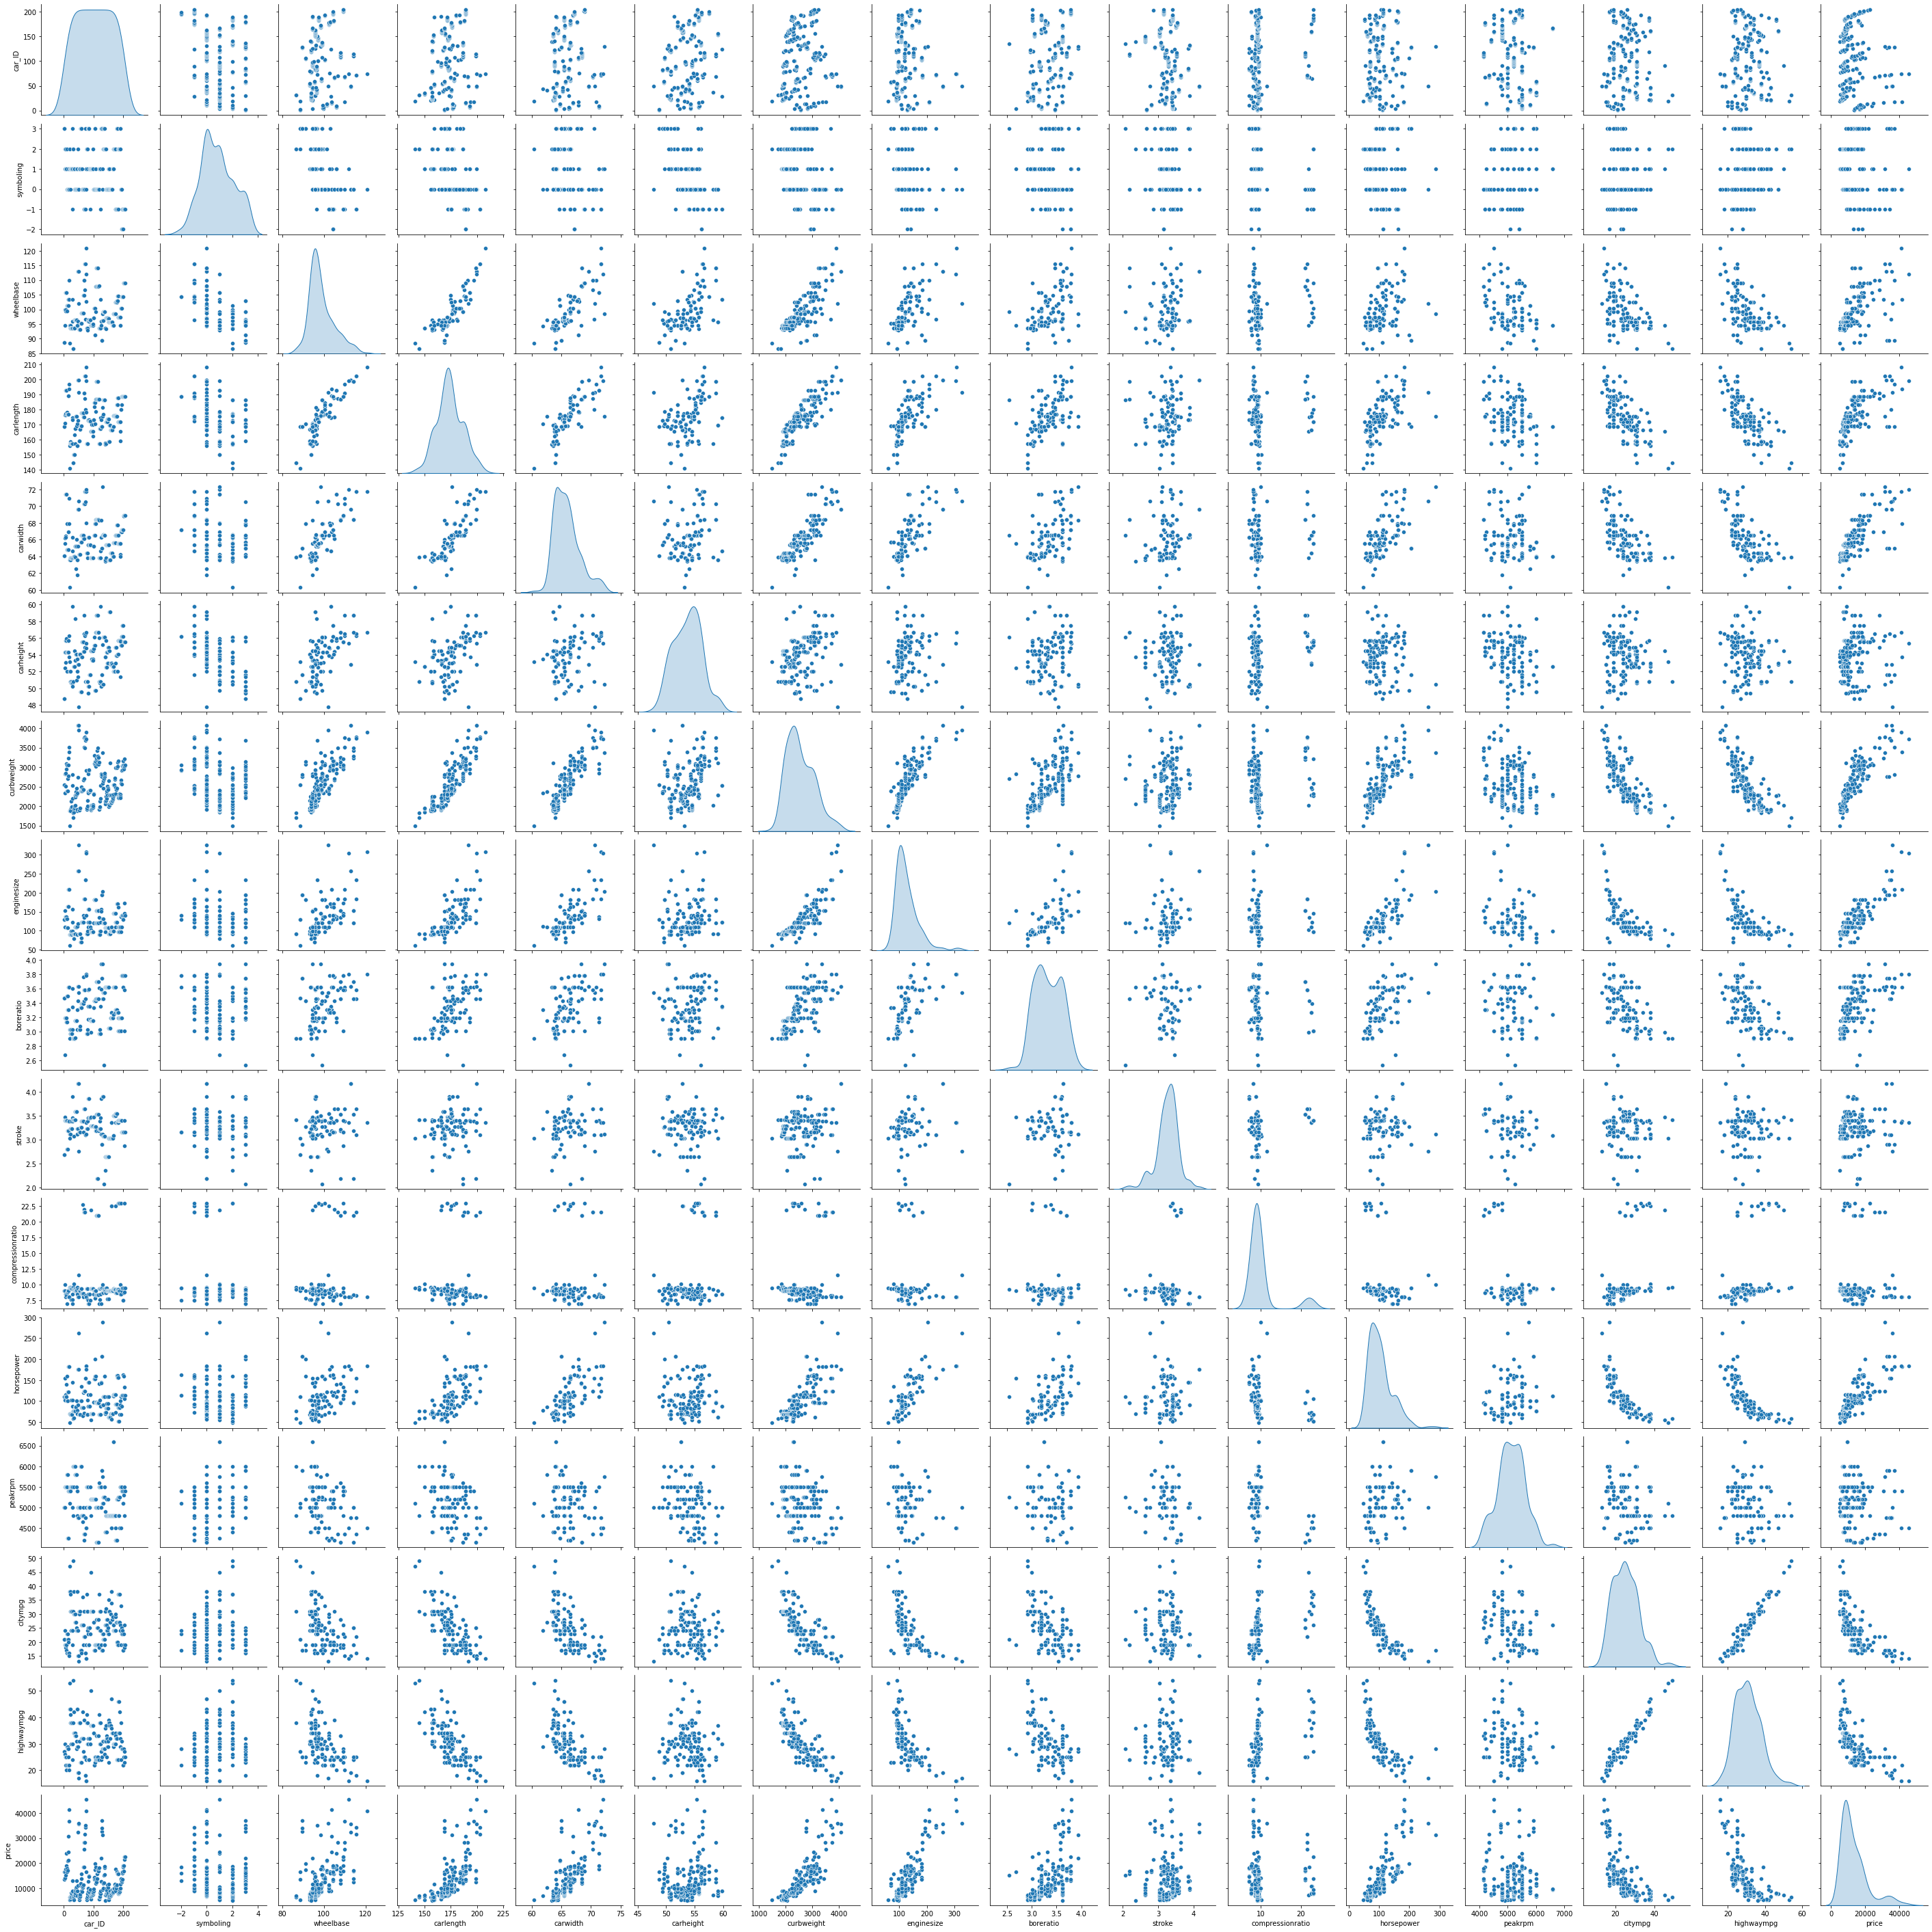

In [21]:
sns.pairplot(car_data, diag_kind="kde")
plt.show()

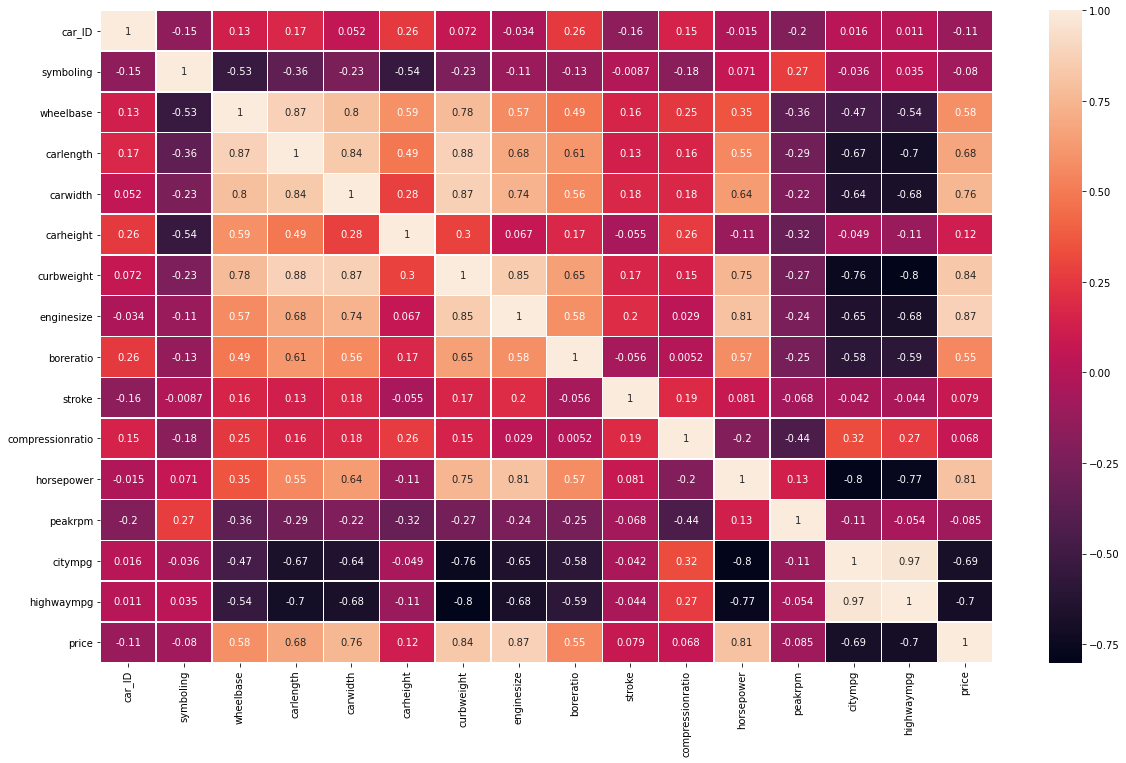

In [22]:
plt.figure(figsize=(20,12))
sns.heatmap(car_data.corr(), linewidths=.5, annot=True)
plt.show()

# The dependent variable price
1. horsepower
2. enginesize
3. curbweight
4. carwidth
5. carlength

In [23]:
car_data.symboling = car_data.symboling.map({-3: 'safe', -2: 'safe',-1: 'safe',0: 'moderate',1: 'moderate',2: 'risky',3:'risky'})

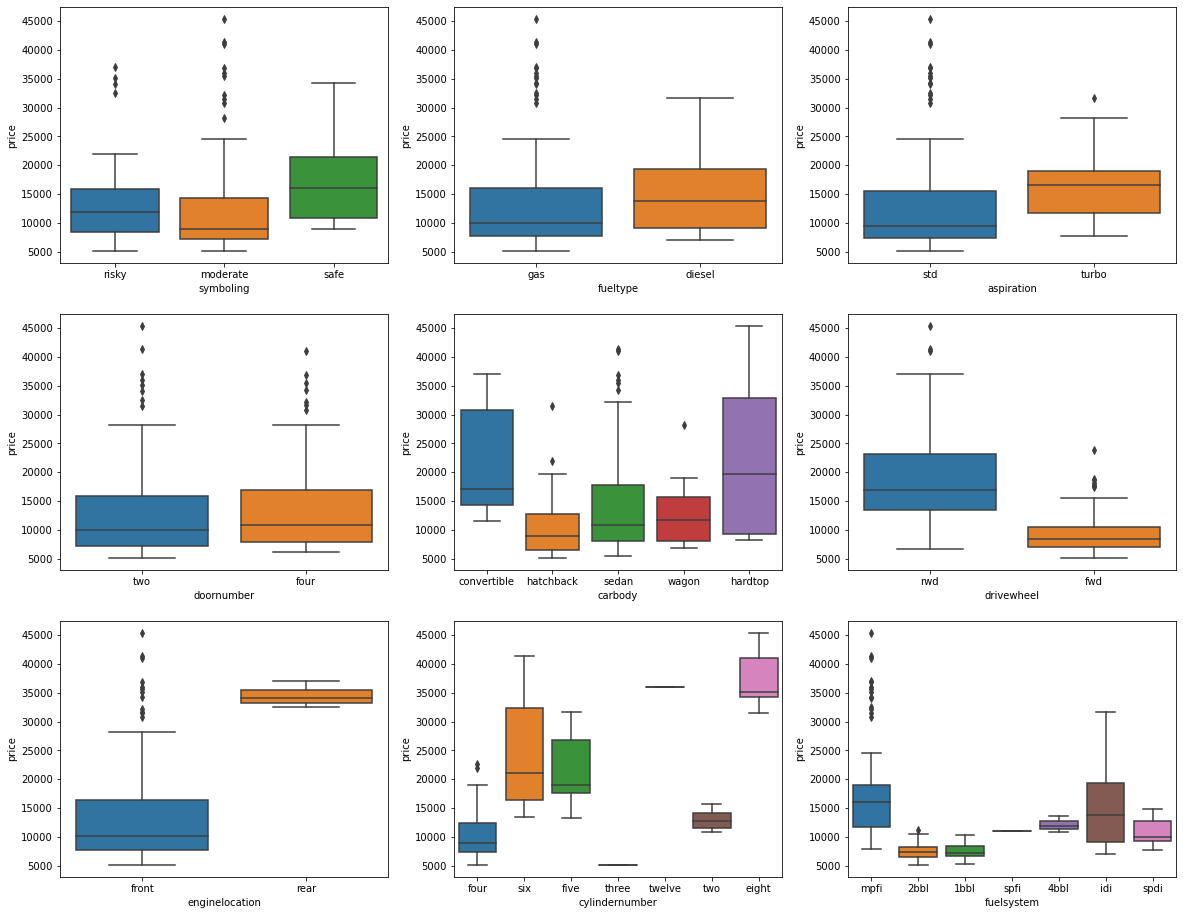

In [24]:
plt.figure(figsize=(20, 16))
plt.subplot(3,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = car_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = car_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = car_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = car_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = car_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginelocation', y = 'price', data = car_data)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_data)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_data)
plt.show()

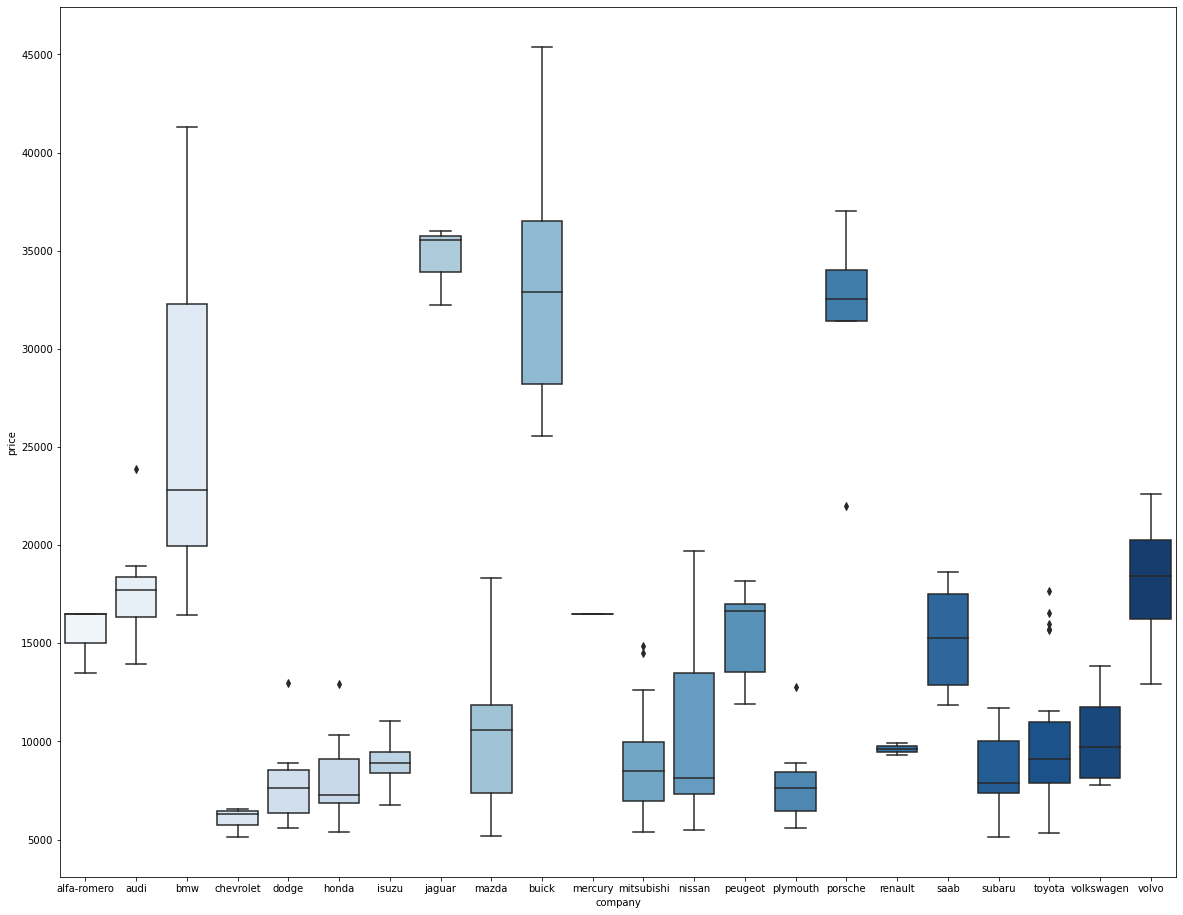

In [25]:
plt.figure(figsize=(20, 16))
sns.boxplot(x = 'company', y = 'price', data = car_data,palette= 'Blues')
plt.show()

In [26]:
car_price = car_data.groupby(['company'])[['price']].median().to_dict()
car_price = car_price['price']
car_price

{'alfa-romero': 16500.0,
 'audi': 17710.0,
 'bmw': 22835.0,
 'buick': 32892.0,
 'chevrolet': 6295.0,
 'dodge': 7609.0,
 'honda': 7295.0,
 'isuzu': 8916.5,
 'jaguar': 35550.0,
 'mazda': 10595.0,
 'mercury': 16503.0,
 'mitsubishi': 8499.0,
 'nissan': 8124.0,
 'peugeot': 16630.0,
 'plymouth': 7609.0,
 'porsche': 32528.0,
 'renault': 9595.0,
 'saab': 15275.0,
 'subaru': 7894.0,
 'toyota': 9103.0,
 'volkswagen': 9737.5,
 'volvo': 18420.0}

In [27]:
dict_keys = car_price.keys()

In [28]:
dict_keys = list(car_price.keys())

In [29]:
for i in dict_keys:
    if car_price[i] < 10000:
        car_price[i] = 'low'
    elif car_price[i] >= 10000 and car_price[i] <= 20000:
        car_price[i] = 'med'
    else:
        car_price[i] = 'high'

car_price

{'alfa-romero': 'med',
 'audi': 'med',
 'bmw': 'high',
 'buick': 'high',
 'chevrolet': 'low',
 'dodge': 'low',
 'honda': 'low',
 'isuzu': 'low',
 'jaguar': 'high',
 'mazda': 'med',
 'mercury': 'med',
 'mitsubishi': 'low',
 'nissan': 'low',
 'peugeot': 'med',
 'plymouth': 'low',
 'porsche': 'high',
 'renault': 'low',
 'saab': 'med',
 'subaru': 'low',
 'toyota': 'low',
 'volkswagen': 'low',
 'volvo': 'med'}

In [30]:
car_data.company = car_data.company.map(car_price)
car_data.company.unique()

array(['med', 'high', 'low'], dtype=object)

In [31]:
car_data = pd.get_dummies(car_data, drop_first=True)


In [32]:
car_data.drop(['car_ID'],axis = 1 ,inplace = True)

In [33]:
car_data

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_low,company_med
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,1,0,0,0,1
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,1,0,0,0,1
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,1,0,0,0,1
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,1,0,0,0,1
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,...,0,0,0,0,0,1,0,0,0,1
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,...,0,0,0,0,0,1,0,0,0,1
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,...,0,0,0,0,0,1,0,0,0,1
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,...,0,0,0,0,1,0,0,0,0,1


In [34]:
y = car_data.loc[:,'price'].values

In [35]:
x = car_data.drop(['price'],axis = 1).values

In [36]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [37]:
y_train = y_train.reshape(143,1)
y_test = y_test.reshape(62,1)

In [38]:
ml = LinearRegression()

In [39]:
model = ml.fit(x_train,y_train)

In [40]:
y_pred= model.predict(x_test)

In [99]:
MSE = mean_squared_error(y_test,y_pred)
MSE

8982692.185277073

In [100]:
RMSE = np.sqrt(MSE)
RMSE

2997.11397602378

In [101]:
MAE= mean_absolute_error(y_test,y_pred)
MAE

2025.8430797857307

In [41]:
model.score(x_train,y_train)

0.9711239462465373

In [102]:
RSQ = r2_score(y_test,y_pred)
RSQ

0.8703503969390445

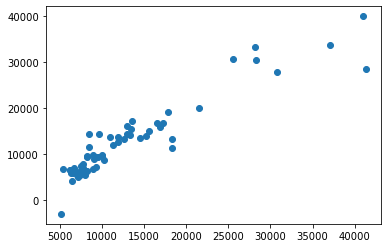

In [93]:
# plt.plot(x_test,y_test,'o' , color = 'r')
plt.plot(y_test,y_pred,'o')
plt.show()

In [68]:
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x.reshape(205,42))

In [69]:
lm = LinearRegression()

In [70]:
poly_model = lm.fit(x_poly,y)

In [71]:
y_poly_predict = poly_model.predict(x_poly)
print(y_poly_predict.shape)
y_poly_predict = y_poly_predict.reshape(205,1)

(205,)


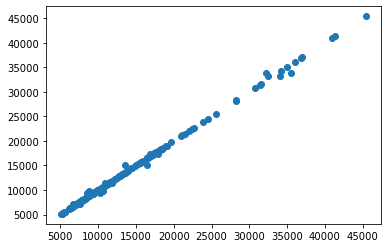

In [111]:
plt.plot(y,y_poly_predict,'o')
plt.show()